# Naive Bayes (the easy way)

We'll cheat by using sklearn.naive_bayes to train a spam classifier! Most of the code is just loading our training data into a pandas DataFrame that we can play with:

In [1]:
import os
import io
import numpy
from pandas import DataFrame
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

def readFiles(path):
    for root, dirnames, filenames in os.walk(path):
        for filename in filenames:
            path = os.path.join(root, filename)

            inBody = False
            lines = []
            f = io.open(path, 'r', encoding='latin1')
            for line in f:
                if inBody:
                    lines.append(line)
                elif line == '\n':
                    inBody = True
            f.close()
            message = '\n'.join(lines)
            yield path, message


def dataFrameFromDirectory(path, classification):
    rows = []
    index = []
    for filename, message in readFiles(path):
        rows.append({'message': message, 'class': classification})
        index.append(filename)

    return DataFrame(rows, index=index)

data = DataFrame({'message': [], 'class': []})

actual_path = os.path.dirname(os.path.realpath('__file__'))

data = data.append(dataFrameFromDirectory(actual_path+'/emails/ham', 'ham'))
data = data.append(dataFrameFromDirectory(actual_path+'/emails/spam', 'spam'))


/var/folders/pk/5lcc82957kv6k6hlpjcnblfr0000gn/T/ipykernel_5041/3855731508.py:39: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(dataFrameFromDirectory(actual_path+'/emails/ham', 'ham'))
/var/folders/pk/5lcc82957kv6k6hlpjcnblfr0000gn/T/ipykernel_5041/3855731508.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = data.append(dataFrameFromDirectory(actual_path+'/emails/spam', 'spam'))


Let's have a look at that DataFrame:

In [2]:
data.head()

,message,class
/Users/maciasalvasalva/ia_curso/10.-Supervised_Models/emails/ham/00769.25bf9a767b5db0ed93f03c1637281663,"\n\nIn a message dated 9/24/2002 11:24:58 AM, ...",ham
/Users/maciasalvasalva/ia_curso/10.-Supervised_Models/emails/ham/01074.8590d61ac0aeeadb58dc2f2ba776c406,"Hiya, I always seem to get errors when I do an...",ham
/Users/maciasalvasalva/ia_curso/10.-Supervised_Models/emails/ham/02479.14365bcad3a60fcf24c5c1813f6291fb,\n\nI don't know how one can expect better and...,ham
/Users/maciasalvasalva/ia_curso/10.-Supervised_Models/emails/ham/01417.ce7b07a2114218dbac682b599785820d,Tim Peters wrote:\n\n> I've run no experiments...,ham
/Users/maciasalvasalva/ia_curso/10.-Supervised_Models/emails/ham/00357.d559b71616f64ba1d1c1e61a03644fd4,"At 10:34 AM -0700 on 8/28/02, Jim Whitehead wr...",ham


Now we will use a CountVectorizer to split up each message into its list of words, and throw that into a MultinomialNB classifier. Call fit() and we've got a trained spam filter ready to go! It's just that easy.

In [3]:
vectorizer = CountVectorizer()
counts = vectorizer.fit_transform(data['message'].values)

classifier = MultinomialNB()
targets = data['class'].values
classifier.fit(counts, targets)

MultinomialNB()

Let's try it out:

In [4]:
examples = ['Free Viagra now!!!', "Hi Bob, how about a game of golf tomorrow?"]
example_counts = vectorizer.transform(examples)
predictions = classifier.predict(example_counts)
predictions

array(['spam', 'ham'], dtype='<U4')

## Activity

Our data set is small, so our spam classifier isn't actually very good. Try running some different test emails through it and see if you get the results you expect.

If you really want to challenge yourself, try applying train/test to this spam classifier - see how well it can predict some subset of the ham and spam emails.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3000 entries, /Users/maciasalvasalva/ia_curso/10.-Supervised_Models/emails/ham/00769.25bf9a767b5db0ed93f03c1637281663 to /Users/maciasalvasalva/ia_curso/10.-Supervised_Models/emails/spam/00013.d3f0b591a65f116ea5d9d4ad919f83aa
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  3000 non-null   object
 1   class    3000 non-null   object
dtypes: object(2)
memory usage: 70.3+ KB


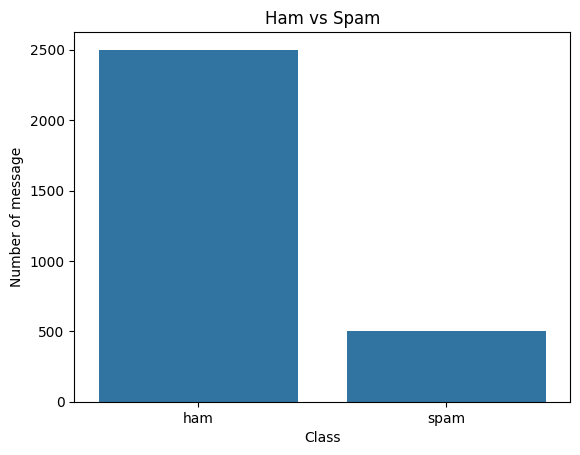

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

class_counts = data['class'].value_counts()

# Crear un barplot
sns.barplot(x=class_counts.index, y=class_counts.values)

# Añadir título y etiquetas a los ejes
plt.title('Ham vs Spam')
plt.xlabel('Class')
plt.ylabel('Number of message')

# Mostrar el plot
plt.show()

In [7]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2, random_state=42)

train.info()
test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2400 entries, /Users/maciasalvasalva/ia_curso/10.-Supervised_Models/emails/ham/00231.b295668c907d5f4d50f8e9db78ae5714 to /Users/maciasalvasalva/ia_curso/10.-Supervised_Models/emails/ham/01825.824c1cafd03a8dbf953d5ab27a191e3e
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  2400 non-null   object
 1   class    2400 non-null   object
dtypes: object(2)
memory usage: 56.2+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 600 entries, /Users/maciasalvasalva/ia_curso/10.-Supervised_Models/emails/ham/01174.6f3f36997e912f8c919ca2d5742b474b to /Users/maciasalvasalva/ia_curso/10.-Supervised_Models/emails/ham/01846.af884c94693e5cce571396b4fd151167
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   message  600 non-null    object
 1   class    600 non-null    object
dtypes: object(2)
memory usage: 14.1+ KB


In [8]:
vectorizer = CountVectorizer()
counts = vectorizer.fit_transform(train['message'].values)

classifier = MultinomialNB()
targets = train['class'].values
classifier.fit(counts, targets)

MultinomialNB()

In [ ]:
examples = ['Free Viagra now!!!', "Hi Bob, how about a game of golf tomorrow?"]
example_counts = vectorizer.transform(examples)
predictions = classifier.predict(example_counts)
predictions

In [24]:

count = 0
accerts = 0
fails = 0

for row in test.itertuples(index=True, name='Pandas'):
    count +=1
    test_x = vectorizer.transform([row.message])
    test_x_predicted = classifier.predict(test_x)
    if test_x_predicted[0] == row._2:
        accerts +=1
    else:
        fails +=1

print("Total Count =",count, "\nAccerts =",accerts, "\nFails =", fails)

Total Count = 600 
Accerts = 577 
Fails = 23
